In [32]:
import numpy as np
import random
import igraph
import networkx as nx
import csv
import json
import pandas as pd
import time
import matplotlib.pyplot as plt

In [33]:
path = '..\data'

In [34]:
def load_data(path, filename):
    with open(path + filename) as json_file:
        data = json.load(json_file)
    print(len(data))
    return data

In [35]:
#load data
data_HR = load_data(path,'\HR_genres.json')
data_HU = load_data(path,'\HU_genres.json')
data_RO = load_data(path,'\RO_genres.json')

54573
47538
41773


In [36]:
# infos on user:
def get_info(data):
    length = [len(v) for v in data.values()]
    print("Min number of genre per user : {}".format(min(length)))
    print("Max number of genre per user : {}".format(max(length)))
    print("Mean number of genre per user : {}".format(np.mean(length)))
    print("Median number of genre per user : {}".format(np.median(length)))
    plt.hist(np.array(length), bins = max(length))

Min number of genre per user : 1
Max number of genre per user : 38
Mean number of genre per user : 6.297344840855368
Median number of genre per user : 4.0


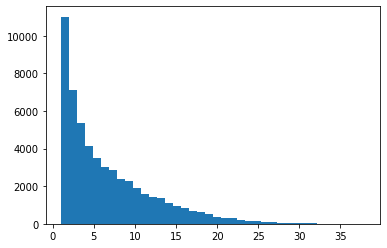

In [37]:
get_info(data_HR)

Min number of genre per user : 1
Max number of genre per user : 42
Mean number of genre per user : 5.993121292439732
Median number of genre per user : 4.0


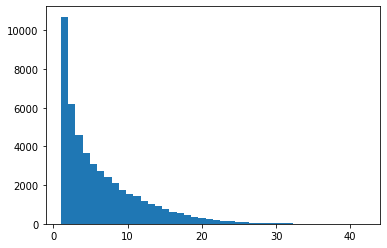

In [38]:
get_info(data_HU)

Min number of genre per user : 1
Max number of genre per user : 52
Mean number of genre per user : 6.03576472841309
Median number of genre per user : 4.0


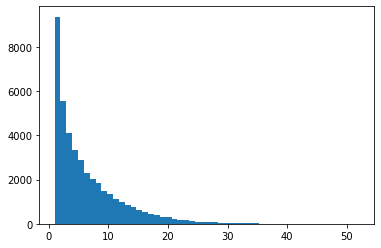

In [39]:
get_info(data_RO)

In [40]:
#get all genres
genres = []
for val in data_HR.values():
    genres += val
for val in data_HU.values():
    genres += val    
for val in data_RO.values():
    genres += val     
genres = list(set(genres))
genres.sort()
columns = ['Id'] + genres

In [41]:
def create_dataframe_unsorted(data):
    array = np.zeros((len(data), len(columns)))
    for key, vals in data.items():
        for val in vals:
            i = int(key)
            j = columns.index(val)
            array[i,0] = i
            array[i,j] = 1 
    df = pd.DataFrame()
    for i,col in enumerate(columns):
        df[col] = array[:,i]
    df = df.set_index('Id')
    return df

In [42]:
#create dataframe with genre all equal
dfu_HR = create_dataframe_unsorted(data_HR)
dfu_HU = create_dataframe_unsorted(data_HU)
dfu_RO = create_dataframe_unsorted(data_RO)

In [43]:
dfu_HR.head(20)

,Acoustic Blues,African Music,Alternative,Alternative Country,Asian Music,Baroque,Bluegrass,Blues,Bolero,Bollywood,...,Stories,TV Soundtracks,TV shows & movies,Techno/House,Traditional Country,Trance,Tropical,Urban Cowboy,Vocal jazz,West Coast
Id,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
# Genres by likes (global)
count = dfu_HR.sum()
count = count.sort_values(ascending = False)
count.head(20)

Pop                    47303.0
Dance                  27101.0
Rock                   25998.0
Rap/Hip Hop            21142.0
Alternative            20707.0
Electro                19654.0
R&B                    15164.0
International Pop      13723.0
Indie Rock             12111.0
Indie Pop/Folk         12030.0
Techno/House           10436.0
Singer & Songwriter    10270.0
Folk                    9999.0
Films/Games             9435.0
Film Scores             8926.0
Indie Pop               8778.0
Contemporary R&B        7192.0
Latin Music             6906.0
Metal                   5333.0
Hard Rock               5031.0
dtype: float64

In [45]:
def create_dataframe_sorted(data):
    array = np.zeros((len(data), len(columns)))
    for key, vals in data.items():
        counter = 0
        for val in vals:
            counter+=1
            i = int(key)
            j = columns.index(val)
            array[i,0] = i
            array[i,j] = counter 
    df = pd.DataFrame()
    for i,col in enumerate(columns):
        df[col] = array[:,i]
    df = df.set_index('Id')
    return df

In [46]:
#create dataframe with weight on genre
dfs_HR = create_dataframe_sorted(data_HR)
dfs_HU = create_dataframe_sorted(data_HU)
dfs_RO = create_dataframe_sorted(data_RO)

In [47]:
dfs_HR.head(20)

,Acoustic Blues,African Music,Alternative,Alternative Country,Asian Music,Baroque,Bluegrass,Blues,Bolero,Bollywood,...,Stories,TV Soundtracks,TV shows & movies,Techno/House,Traditional Country,Trance,Tropical,Urban Cowboy,Vocal jazz,West Coast
Id,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0


In [59]:
#Genres by most liked (only the first genre of each user is counted)
count = dfs_HR.eq(1.0).sum()
count = count.sort_values(ascending = False)
count.head(60)

Dance                        9970
Pop                          9289
Films/Games                  5937
Indie Rock                   4000
Rap/Hip Hop                  3385
Reggae                       2820
International Pop            2221
Dancefloor                   2211
Indie Pop/Folk               1835
Alternative                  1612
Folk                         1497
Rock                         1288
R&B                           969
Electro                       823
Techno/House                  783
Film Scores                   774
Comedy                        608
Hard Rock                     580
Kids                          505
Indie Pop                     434
Latin Music                   427
Dirty South                   397
Classical                     310
Country                       252
Metal                         251
Singer & Songwriter           251
Jazz                          222
Rock & Roll/Rockabilly        215
Blues                         144
Spirituality &

In [49]:
def create_dataframe_label(data):
    Id = [0]*len(data)
    Genres = [0]*len(data)
    for key, vals in data.items():
        i = int(key)
        Id[i] = i
        Genres[i] = vals[0]
    df = pd.DataFrame()
    df["Id"] = Id
    df["Genre"] = Genres
    df = df.set_index('Id')
    return df

In [50]:
labels_HR = create_dataframe_label(data_HR)
labels_HR.head(20)

,Genre
Id,
0,Kids
1,Rap/Hip Hop
2,Pop
3,Jazz
4,International Pop
5,Singer & Songwriter
6,Indie Pop/Folk
7,Films/Games
8,Dance
